## Introduction

Information about the Ames Housing dataset, and data download links, can be found [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf).

The objective is to predict sale prices based on a data sample of ~ 2900 homes. The model below uses a Random Forest regression, and achieves an excellent R^2 score of 0.9.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
pd.set_option('display.max_columns', 100)

In [2]:
housing_data = pd.read_excel('AmesHousing.xls')
housing_data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.000,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.000,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.000,Unf,0.000,441.000,1080.000,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.000,0.000,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.000,Fin,2.000,528.000,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.000,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.000,Gd,TA,CBlock,TA,TA,No,ALQ,1065.000,Unf,0.000,1045.000,2110.000,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.000,0.000,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.000,Fin,2.000,522.000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [329]:
#Based on the documentation, this is a list of columns that contain meaningful numeric values
num_data_cols = ["Lot Frontage", "Lot Area", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF","1st Flr SF","2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", "Bsmt Full Bath", "Bsmt Half Bath", "Full Bath", "Half Bath", "Bedroom AbvGr", "Kitchen AbvGr", "TotRms AbvGrd", "Fireplaces", "Garage Yr Blt", "Garage Cars", "Garage Area", "Wood Deck SF", "Open Porch SF", "Enclosed Porch", "3Ssn Porch", "Screen Porch", "Pool Area", "Misc Val", "Mo Sold", "Yr Sold", "SalePrice"]


## Exploring the Data

Let's examine the data and do some cleaning up.

In [14]:
# Show the columns that are missing data

null_data = housing_data.isnull().sum() 
null_data[null_data.values > 0]

Lot Frontage        490
Alley              2732
Mas Vnr Type         23
Mas Vnr Area       1771
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1        931
BsmtFin Type 2       81
BsmtFin SF 2       2579
Bsmt Unf SF         245
Total Bsmt SF        80
Electrical            1
2nd Flr SF         1678
Low Qual Fin SF    2890
Bsmt Full Bath     1709
Bsmt Half Bath     2755
Full Bath            12
Half Bath          1843
Bedroom AbvGr         8
Kitchen AbvGr         3
Fireplaces         1422
Fireplace Qu       1422
Garage Type         157
Garage Yr Blt       159
Garage Finish       159
Garage Cars         158
Garage Area         158
Garage Qual         159
Garage Cond         159
Wood Deck SF       1526
Open Porch SF      1300
Enclosed Porch     2471
3Ssn Porch         2893
Screen Porch       2674
Pool Area          2917
Pool QC            2917
Fence              2358
Misc Feature       2824
Misc Val           2827
dtype: int64

In [15]:
#first convert zero values to NaN on numeric features to get a true measure of missing data

numeric_features = housing_data.dtypes[housing_data.dtypes != "object"].index
for col in numeric_features:
    housing_data[col].replace([0], [np.NaN], inplace=True)


In [8]:
# Several features are missing too much data to be useful, let's drop those with more than 20% missing values

missing_data = housing_data.isnull().sum() 
drop_cols = missing_data[missing_data.values > len(housing_data) * .2].index #list the columns to drop
clean_data = housing_data.drop(columns=drop_cols)

#Let's also drop the Order and PID columns, they are not relevant to predicting prices.
clean_data = clean_data.drop(columns = ["Order", "PID"])

In [9]:
# Impute numeric data using mean values for each feature

from sklearn.preprocessing import Imputer

numeric_features = clean_data.dtypes[clean_data.dtypes != "object"].index

housing_imputer = Imputer(strategy='mean')
data_imputed = housing_imputer.fit_transform(clean_data[numeric_features])

data_imputed = pd.DataFrame(data_imputed, columns = numeric_features)

clean_data_imputed = clean_data
for col in numeric_features:
    clean_data_imputed[col] = data_imputed[col]
        


In [334]:
# Impute categorical features -- replace NaN with most frequent value in each column

categorical_features = clean_data_imputed.dtypes[clean_data_imputed.dtypes == "object"].index
for col in categorical_features:
    most_frequent_value = clean_data_imputed[col].value_counts().index[0]
    clean_data_imputed[col].fillna(value=most_frequent_value, inplace=True)

# Are there any more missing data?
data_qual = clean_data_imputed[categorical_features].isnull().sum()
print('Number of features missing data = ', len(data_qual.index[data_qual.values >0]))

Number of features missing data =  0


#### Looks much better!

We got rid of data columns that were mostly empty or irrelevant, and replaced null values in the remaining columns with useful approximations.

Which features are most correlated with sale price? Here's a handy heat map.

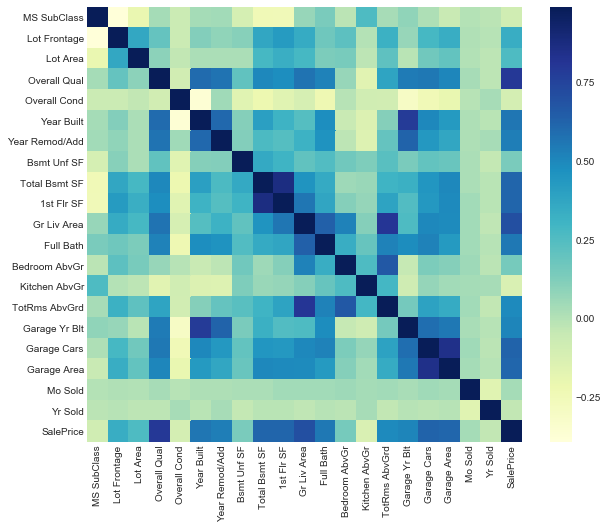

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
corr_heatmap = sns.heatmap(clean_data_imputed.corr(), vmax=0.99, square=True, cmap="YlGnBu", ax=ax)

### Exploring more correlations to guide the modeling

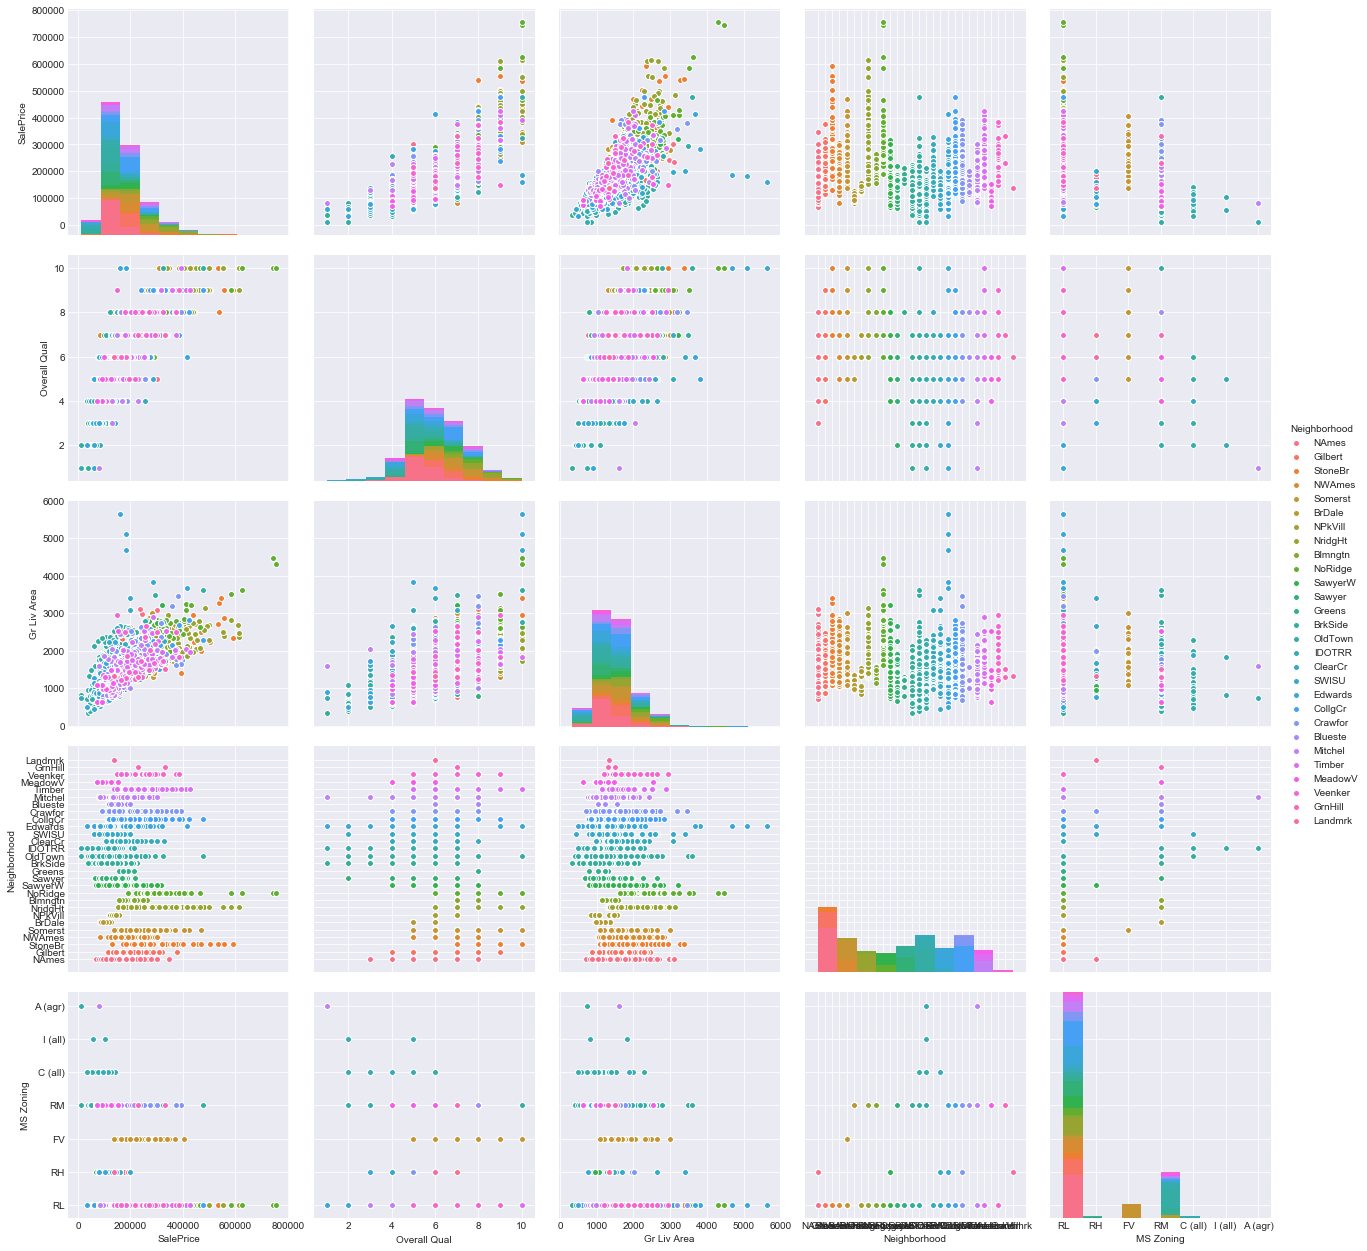

In [68]:
graph_data = sns.pairplot(clean_data_imputed, size=3.5, vars= ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Neighborhood', 'MS Zoning'], hue='Neighborhood', diag_kind='hist')


### How does the mean price vary by neighborhood?

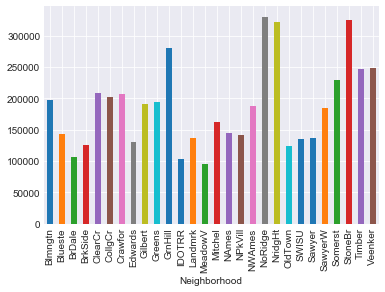

In [73]:
final_data = clean_data_imputed
final_data.groupby("Neighborhood").SalePrice.mean().plot(kind='bar')

### Visualizing a few more features to sport correlations 

Text(0.5,1,'Year Built')

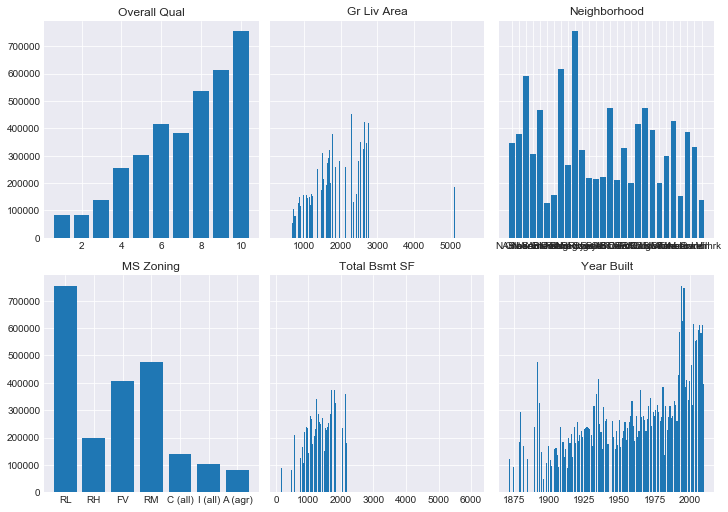

In [152]:
fig, ax = plt.subplots(2, 3, sharex=False, sharey=True, constrained_layout=True, figsize=(10,7))
feature_plot = ['Overall Qual', 'Gr Liv Area', 'Neighborhood', 'MS Zoning', 'Total Bsmt SF', 'Year Built']

ax[0,0].bar(final_data[feature_plot[0]], final_data.SalePrice)
ax[0,0].set_title(feature_plot[0])

ax[0,1].bar(final_data[feature_plot[1]], final_data.SalePrice)
ax[0,1].set_title(feature_plot[1])

ax[0,2].bar(final_data[feature_plot[2]], final_data.SalePrice)
ax[0,2].set_title(feature_plot[2])

ax[1,0].bar(final_data[feature_plot[3]], final_data.SalePrice)
ax[1,0].set_title(feature_plot[3])

ax[1,1].bar(final_data[feature_plot[4]], final_data.SalePrice)
ax[1,1].set_title(feature_plot[4])

ax[1,2].bar(final_data[feature_plot[5]], final_data.SalePrice)
ax[1,2].set_title(feature_plot[5])

    

### Building the model

In [368]:
# Split training and testing sets
from sklearn.cross_validation import train_test_split

# Group Yr Sold and Year Built into bins
YrSold = pd.cut(final_data['Yr Sold'], 10)
final_data['YrSold_bin'] = YrSold
YrBuilt = pd.cut(final_data['Year Built'], 10)
final_data['YrBuilt_bin'] = YrBuilt

# Use total square footage as a single feature (instead of multiple SF features)
final_data['Total SF'] = final_data['Gr Liv Area'] + final_data['Total Bsmt SF']

# let's focus on highest correlation features
high_corr = ['Overall Qual', 'Total SF', 'Neighborhood', 'MS Zoning', 'YrBuilt_bin', 'YrSold_bin', 
             'Kitchen Qual', 'TotRms AbvGrd', 'Lot Frontage', 'Overall Cond', 'MS SubClass', 'Central Air', 'Mo Sold']
             


encoded_features = pd.get_dummies(final_data[high_corr], columns=['Neighborhood', 'MS Zoning', 'Kitchen Qual', 
                                                                  'YrSold_bin', 'YrBuilt_bin', 'MS SubClass', 'Central Air', 
                                                                  'Overall Qual', 'Overall Cond'], 
                     prefix=['Neighborhood','Zoning', 'KitchenQual', 'YearSold', 'YearBuilt', 'SubClass','CentralAir', 'Quality', 'Condition'])


X_train, X_test, y_train, y_test = train_test_split(encoded_features, final_data.SalePrice, test_size = 0.1, random_state = 0)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 500, random_state = 0, verbose=0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)



### Evaluating prediction accuracy

In [369]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE = {:.2f}'.format(rmse))

r2_score = metrics.r2_score(y_test, y_pred)
print('R^2 Score = {:.2f}'.format(r2_score))

mean_price = np.mean(y_test)
print('Mean house price = {:.2f}'.format(mean_price))

print('RMSE % of mean price: {:.2f}%'.format( rmse / mean_price * 100))



RMSE = 25526.36
R^2 Score = 0.90
Mean house price = 184949.92
RMSE % of mean price: 13.80%


Avg accuracy: 1.0183
Accuracy SD: 0.1589
Regressor score = 0.8958


Text(0.5,1,'Accuracy - 293 Samples')

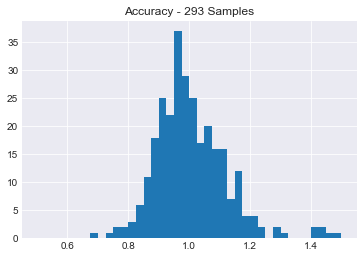

In [370]:
acc = y_pred / y_test

print('Avg accuracy: {:.4f}'.format(np.mean(acc)))
print('Accuracy SD: {:.4f}'.format(np.std(acc)))
print ('Regressor score = {:.4f}'.format(regressor.score(X_test, y_test)))

plt.hist(acc, bins = 40, range=(.5,1.5))
plt.title('Accuracy - {} Samples'.format(len(y_test)))


### Feature Importance

The graph below is a little surpirising in that the square footage feature was so dominant for the model, far ahead of location and quality.

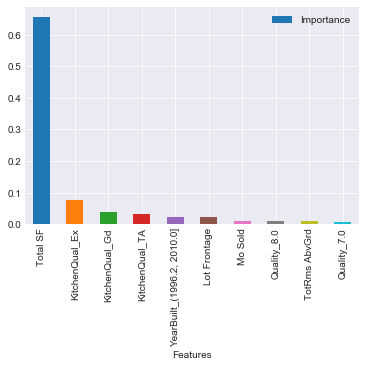

In [371]:
fi = pd.DataFrame()
fi['Features'] = X_train.columns
fi['Importance'] = regressor.feature_importances_
fi.sort_values('Importance', axis=0, ascending=False, inplace=True)
fi.head(10).plot(x='Features', y='Importance', kind='bar')